In [236]:
import networkx as nx
import matplotlib.pyplot as plt
from deap import base, creator, tools,algorithms
import random


In [237]:
paths = {
    'Madrid-Barcelona': {'cost': 98, 'time': 150},
    'Madrid-Paris': {'cost': 380, 'time':225 },
    'Barcelona-Paris': {'cost': 400, 'time': 390},
    'Barcelona-Lyon': {'cost': 320, 'time': 200},
    'Lyon-Paris': {'cost': 185, 'time': 112},
    'Lyon-Milan': {'cost': 180, 'time': 176},
    'Paris-London': {'cost': 98, 'time': 136},
    'Paris-Brussels': {'cost': 80, 'time': 82},
    'Paris-Frankfurt': {'cost': 345, 'time': 480},
    'Milan-Rome': {'cost': 125, 'time': 168},
    'Brussels-Amsterdam': {'cost': 48, 'time': 105},
    'Brussels-London': {'cost': 98, 'time': 136},
    'Amsterdam-Cologne': {'cost': 40, 'time': 120},
    'Frankfurt-Cologne': {'cost': 40, 'time': 120},
    'Amsterdam-Berlin': {'cost': 235, 'time': 364},
    'Frankfurt-Berlin': {'cost': 125, 'time': 232},
    'Frankfurt-Milan': {'cost': 240, 'time': 454}
}
cities = []

for path in paths:
    cities.append(path.split('-')[0])
    cities.append(path.split('-')[1])
cities = list(set(cities))

G = nx.Graph()
for city in cities:
    G.add_node(city)

for path, attributes in paths.items():
    origin, destination = path.split('-')
    cost = attributes['cost']
    time = attributes['time']
    G.add_edge(origin, destination, weight=cost, time=time)

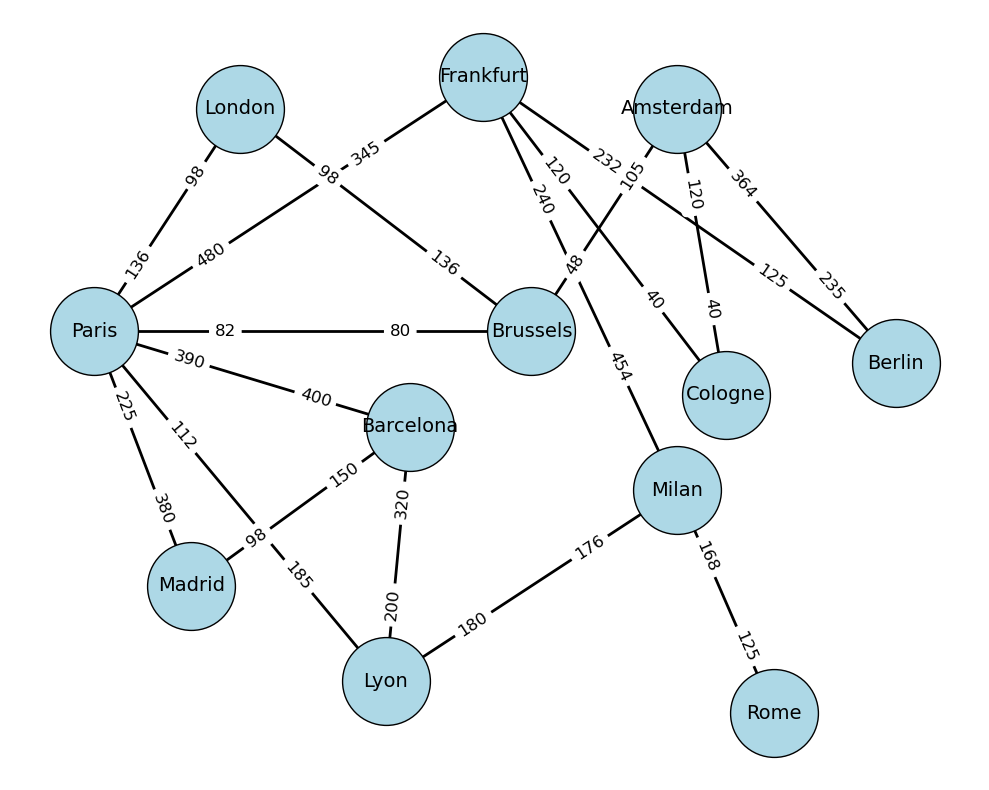

In [238]:
pos = {'Madrid': (-4, -3),
       'Barcelona': (5, 2),
       'Paris': (-8, 5),
       'Lyon': (4, -6),
       'Milan': (16, 0),
       'London': (-2, 12),
       'Brussels': (10, 5),
       'Frankfurt': (8, 13),
       'Rome': (20, -7),
       'Amsterdam': (16, 12),
       'Cologne': (18, 3),
       'Berlin': (25, 4)}

edge_labels_cost = nx.get_edge_attributes(G, 'weight')
edge_labels_time = nx.get_edge_attributes(G, 'time')

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='lightblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=2, edge_color='black')

nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_cost, label_pos=0.3, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_time, label_pos=0.7, font_size=12)

plt.axis('off')
plt.tight_layout()
plt.show()

In [239]:
def fitness_integer(integer_population):
    results = []
    for path in integer_population:
        cost = 0
        time = 0
        for i in range(len(path)-1):
            origin_num = path[i]
            destination_num = path[i+1]
            origin = cities[origin_num]
            destination = cities[destination_num]
            if G.has_edge(origin, destination):
                cost += G[origin][destination]['weight']
                time += G[origin][destination]['time']
            else:
                cost_length = nx.shortest_path_length(G, origin, destination, weight='weight')
                time_length = nx.shortest_path_length(G, origin, destination, weight='time')
                cost += cost_length
                time += time_length

        if time <= 4320:
            results.append((path, cost, time))
            
        else:
            return (99999999, 99999999) 
        
    return results[0][1:] if results else (99999999, 99999999)


In [240]:


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)



toolbox = base.Toolbox()


POPULATION_SIZE =1000 


MUTATION_PROBABILITY = 0.02


CROSSOVER_PROBABILITY = 0.4


NUM_GENERATIONS = 100


TOURNAMENT_SIZE = 5


toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", lambda x: (fitness_integer([x])[0],))
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(cities))
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)


def main():
    
   
 
    population = toolbox.population(n=POPULATION_SIZE)
  
    fitnesses = map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit


    for generation in range(NUM_GENERATIONS):
        offspring = algorithms.varAnd(population, toolbox, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)
        fitnesses = map(toolbox.evaluate, offspring)
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit
        population = toolbox.select(offspring + population, k=POPULATION_SIZE)

    best_solution = tools.selBest(population, k=1)[0]
    path = best_solution
    cost, time = fitness_integer([path])
    city_indices = range(len(cities))
    city_names = {i: city for i, city in zip(city_indices, cities)}
    path_cities = [city_names[i] for i in path]
    print(f"Best path: {path_cities}. Cost: {cost}. Time: {time}")
if __name__ == "__main__":
    main()


Best path: ['Madrid', 'Barcelona', 'Lyon', 'Paris', 'London', 'Brussels', 'Amsterdam', 'Cologne', 'Frankfurt', 'Berlin', 'Milan', 'Rome']. Cost: 1542. Time: 2165
